# Multiple_Linear_Regression


In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
d=pd.read_csv('Startups.csv')

In [3]:
#let's check the size of data-set
d.shape

(50, 5)

In [4]:
#check the first 5 rows of data
print(d.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


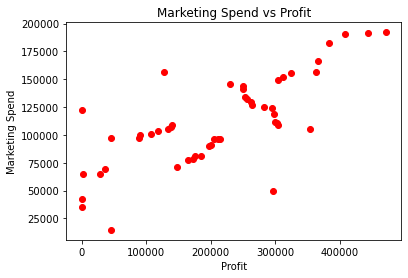

In [5]:
#Let's check correlation between profit and others independent variable

plt.scatter(d['Marketing Spend'],d['Profit'],c='red')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Profit')
plt.ylabel('Marketing Spend')
plt.show()

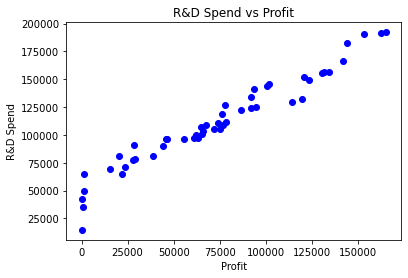

In [6]:
plt.scatter(d['R&D Spend'],d['Profit'],c='blue')
plt.title('R&D Spend vs Profit')
plt.xlabel('Profit')
plt.ylabel('R&D Spend')
plt.show()

In [7]:
#let's divide data into dependent and independent 
x=d.iloc[:,:-1].values        # it take all the data except 'profit' column
y=d.iloc[:,-1].values         # it take data from 'profit' column

In [8]:
# Here we have to do encoding of categorical data because we have to converte it into numeric array (state column)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [9]:
# now check the new value of x
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [10]:
#let's split data into train and testig

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#import linear model

from sklearn.linear_model import LinearRegression
MLR=LinearRegression()

In [11]:
MLR.fit(x_train,y_train)
y_predict=MLR.predict(x_test)

In [12]:
d.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
#let's predict the first value from above tabel and check how it is efficient

MLR.predict([[0.0, 0.0, 1.0,165349.20,136897.80,471784.10]])

array([191913.7274038])

In [14]:
print(f'value of intercept is = {MLR.intercept_}\n\nvalues of coeffient are = {MLR.coef_}')

value of intercept is = 54343.299849439005

values of coeffient are = [-3.15260255e+02  6.23532751e+02 -3.08272495e+02  8.05630064e-01
 -6.87878823e-02  2.98554429e-02]
